<h1>Introduction</h1>
<p>Hello all! In this notebook I'm going to analyze different products data and implement multiple 
    Machine Learning algorithms to predict the Demand of each Product</p>
<h3>My main objectives on this project are:</h3>   
<ul>
    <li>Applying exploratory data analysis and trying to get some insights about our dataset</li>
    <li>Getting data in better shape by transforming and feature engineering to help us in building better models</li>
    <li>Building and tuning different models to get some stable results on predicting Demand</li>
</ul>

<h2>Importing Libraries</h2>
<p>Lets start by importing some packages we are going to need</p>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.linear_model import LinearRegression

<h2>Meeting the data</h2>
<p>Lets open the data and see what we have</p>

In [2]:
#Opening the data
originalTrain = pd.read_csv("./train.csv")
originalTest = pd.read_csv("./test.csv")

In [3]:
#Lets see the shapes of the data so we know what we are dealing with
originalTrain.shape, originalTest.shape

((7560, 12), (1080, 12))

<p>We can see that we have 7560 rows on the train dataframe, and 1080 rows on the test dataframe, both with 12 columns.

With that information, we can already calculate the distribution of train - test data:
percentage_train_rows = 7560*100/(7560+1080) = 87.5%
percentage_test_rows = 100% - 87.5% = 12.5%
7/8 of the dataset belongs to train data and the remaining 1/8 belongs to test data

Now lets observe some of their elements</p>

In [4]:
originalTrain.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [5]:
originalTest.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923


In [6]:
originalTrain.describe()

,id,lat,long,pop,price,quantity
count,6480.000000,6429.000000,6434.000000,6480.000000,6480.000000,6480.000000
mean,3239.500000,38.301238,23.270246,355141.416667,1.188981,29431.855093
std,1870.759204,1.649771,1.086960,232828.796289,0.814567,17901.328301
min,0.000000,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,1619.750000,37.962450,22.417610,141439.750000,0.610000,16441.750000
50%,3239.500000,38.244440,22.930860,257501.500000,0.920000,25184.000000
75%,4859.250000,39.636890,23.716220,665871.000000,1.500000,37866.000000
max,6479.000000,40.643610,25.143410,672130.000000,4.540000,145287.000000


In [7]:
originalTest.describe()

,id,lat,long,pop,price,quantity
count,1080.00000,1072.000000,1067.000000,1080.000000,1080.000000,1080.000000
mean,7019.50000,38.298228,23.269862,355370.166667,1.238454,29360.875926
std,311.91345,1.655656,1.088977,230207.452873,0.829449,16182.538761
min,6480.00000,35.327870,21.734440,137154.000000,0.230000,3523.000000
25%,6749.75000,37.962450,22.417610,144651.000000,0.650000,17229.750000
50%,7019.50000,38.244440,22.930860,261162.000000,0.980000,26010.500000
75%,7289.25000,39.636890,23.716220,664046.000000,1.555000,37421.750000
max,7559.00000,40.643610,25.143410,664046.000000,4.790000,116612.000000


<li>Id column looks useless, so we can safely drop it from both. I'm going to save our target (quantity) on a different variable so we can use it in future.</li>
<li>Lets first make a copy of the dataframes so we can keep the originals intact</li>

In [8]:
train = originalTrain.copy()
test = originalTest.copy()

#Dropping unnecessary Id column.

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

#Dropping rows without quantity

train.dropna(axis=0, subset=['quantity'], inplace=True)
test.dropna(axis=0, subset=['quantity'],inplace=True)

#Backing up target variables and dropping them from train data.
y_train = train['quantity']
X_train = train

y_test = test['quantity']
X_test = test

#Dropping rows without date
#train['date'].dropna(inplace=True)
#test['date'].dropna(inplace=True)

In [9]:
X_train.isnull().sum()

date          0
city          0
lat          51
long         46
pop           0
shop          0
brand         0
container    16
capacity     15
price         0
quantity      0
dtype: int64

<h2>EDA</h2>
<p>Exploratory Data Analysis</p>

<p>We're going to start with basic correlation table here. I dropped the top part since it's just mirror of the other part below. With this table we can understand some linear relations between different features.</p>

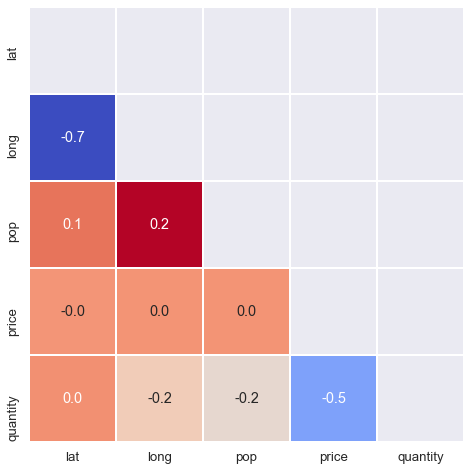

In [10]:
# Display numerical correlations between features.

sns.set(font_scale=1.2)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

<h4>Observations</h4>
<li>We can see there's a negative correlation between quantity and price,
indicating, that quantity tends to get lower as price increases </li>

<h2>Missing Data</h2>
<p>Steps:</p>
<ol>
    <li>Merge the datasets here before we start editing it so we don't have to do these operations twice.</li>
    <li>Detect missing values and visualize them</li>
    <li>Get rid of them for the next steps of our work</li>
</ol>

In [11]:
features = pd.concat([X_train, X_test]).reset_index(drop=True)
#Lets see the new shape of the features dataframe
print(features.shape)

(7560, 11)


In [12]:
def missing_percentage(df):
    
    #Defining a function for returning missing ratios
    
    total = df.isnull().sum().sort_values(
        ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
              100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                   100) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


,long,lat,capacity,container
Total,59.000000,59.000000,19.000000,19.000000
Percent,0.780423,0.780423,0.251323,0.251323


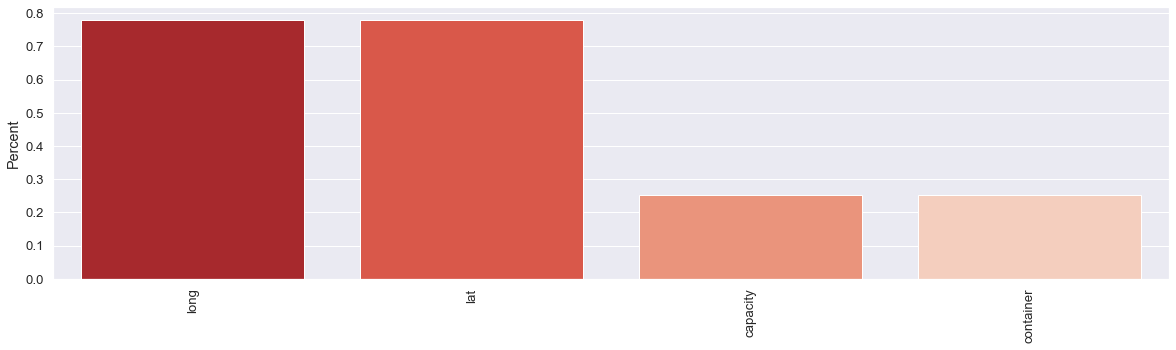

In [13]:
#Checking 'NaN' values.

missing = missing_percentage(features)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))


<h2>Pipeline</h2>
<p>Steps:</p>
<ol>
    <li>Extract year, month and day from date so we can use them as numerical features</li>
    <li>Add Year, Month and Day columns to the dataset</li>
    <li>Eliminate date column from the dataset</li>
    <li>
        <ol>
            <li>Fill long, lat, price and pop columns with their mean values</li>
            <li>Fill capacity, brand, shop, container, city, year, month, day with their most-repeated values</li>
        </ol>
    </li>
    <li>One Hot Encode capacity, brand, shop, container, city, year, month and day</li>
    <li>Fit the model</li>
</ol>

In [14]:
#Import neccesary packages to create the pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [15]:
#Import the BaseEstimator
from sklearn.base import BaseEstimator

#Define the class dateProcessor
#Custom transformer must have methods fit and transform
class DateProcessor(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, df):
        df['date'] = pd.to_datetime(df['date'], errors="coerce")
        #df.dropna(axis=1, subset=['date'], inplace=True)
        #format="%d%m%Y",errors="ignore"
        df['day'] = df['date'].dt.day
        df['month'] = df['date'].dt.month
        df['year'] = df['date'].dt.year
        
        return df

In [16]:
date_process = DateProcessor()
X_train = date_process.transform(X_train)
X_train.drop(inplace=True, columns='date')
X_train

,city,lat,long,pop,shop,brand,container,capacity,price,quantity,day,month,year
0,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,31,1,2012
1,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,31,1,2012
2,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,31,1,2012
3,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,31,1,2012
4,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,31,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0,31,12,2017
6476,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0,31,12,2017
6477,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0,31,12,2017
6478,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0,31,12,2017


In [17]:
num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
num_columns
cat_columns = X_train.select_dtypes(include=['object']).columns
cat_columns

Index(['city', 'shop', 'brand', 'container', 'capacity'], dtype='object')

In [43]:
# define column groups with same processing
num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X_train.select_dtypes(include=['object']).columns
# define transformers
imputerMean = SimpleImputer(strategy='constant', fill_value=0)
imputerMF = StandardScaler()
ss = StandardScaler()
onehot = OneHotEncoder()
# set up pipelines for each column group
categorical_pipe = Pipeline([('impute_mf', imputerMF), ('one_hot', onehot)])
numeric_pipe = Pipeline([('impute_mean', imputerMean), ('ss', ss)])
# set up columnTransformer
col_transformer = ColumnTransformer(
                    transformers=[
                        ('cats', categorical_pipe, cat_columns),
                        ('nums', numeric_pipe, num_columns)
                    ],
                    remainder='drop',
                    n_jobs=-1
                    )

In [46]:
#('processDate', DateProcessor()),
model_pipeline = Pipeline(steps=[
                                ('pre_process', col_transformer),
                                ('linear_regression', LinearRegression())
                                ])
model_pipeline.fit(X_train, y_train)

#Predict target values on the training data
predictions = model_pipeline.predict(X_test)

ValueError: could not convert string to float: 'Athens'

In [48]:
X_train[cat_columns].isnull().sum()

city          0
shop          0
brand         0
container    16
capacity     15
dtype: int64

In [49]:
X_train.dtypes

city          object
lat          float64
long         float64
pop          float64
shop          object
brand         object
container     object
capacity      object
price        float64
quantity     float64
day            int64
month          int64
year           int64
dtype: object